In [2]:
import pandas as pd
import os

In [3]:
folder = "/Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0"

In [6]:
waveform_numerics = pd.read_csv(os.path.join(folder, "waveform_records.csv"))
waveform_numerics.head()

,record_id,subject_id,hadm_id,start_datetime,end_datetime,record_duration_sec,file_path,header_file,base_counter_freq,num_segments
0,81739927,10014354,NaN,2148-08-16 09:00:17,2148-08-17 14:37:22,6661120,p100/p10014354/81739927,81739927.hea,62.4725,21
1,87033314,10019003,NaN,2155-07-10 19:05:46,2155-07-13 15:00:01,15271680,p100/p10019003/87033314,87033314.hea,62.4725,11
2,83404654,10020306,NaN,2135-01-21 17:02:28,2135-01-24 21:20:44,17160960,p100/p10020306/83404654,83404654.hea,62.4725,30
3,83411188,10039708,NaN,2143-09-19 21:09:38,2143-09-20 11:18:39,3182400,p100/p10039708/83411188,83411188.hea,62.4725,6
4,85583557,10039708,NaN,2143-09-20 13:19:20,2143-09-20 16:12:23,648640,p100/p10039708/85583557,85583557.hea,62.4725,2


In [8]:
waveform_numerics.shape

(200, 10)

In [7]:
# check for missing values
waveform_numerics.isnull().sum()

record_id                0
subject_id               0
hadm_id                200
start_datetime           0
end_datetime             0
record_duration_sec      0
file_path                0
header_file              0
base_counter_freq        0
num_segments             0
dtype: int64

In [2]:
folder = "/Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-ECG"

In [3]:
records_w_diag_icd10 = pd.read_csv(folder + "/mimic-iv-ecg-ext-icd-diagnostic-labels-for-mimic-iv-ecg-1.0.1/records_w_diag_icd10.csv")
records_w_diag_icd10.head()

,file_name,study_id,subject_id,ecg_time,ed_stay_id,ed_hadm_id,hosp_hadm_id,ed_diag_ed,ed_diag_hosp,hosp_diag_hosp,...,age,anchor_year,anchor_age,dod,ecg_no_within_stay,ecg_taken_in_ed,ecg_taken_in_hosp,ecg_taken_in_ed_or_hosp,fold,strat_fold
0,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,40689238,10000032,2180-07-23 08:44:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,52.0,2180.0,52.0,2180-09-09,0,True,False,True,17,9
1,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,44458630,10000032,2180-07-23 09:54:00,39399961.0,29079034.0,NaN,"['R4182', 'G9340']","['F319', 'J449', 'B182', 'E871', 'V462', 'I958...",[],...,52.0,2180.0,52.0,2180-09-09,1,True,False,True,17,9
2,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,49036311,10000032,2180-08-06 09:07:00,NaN,NaN,25742920.0,[],[],"['J449', 'B182', 'E871', 'R197', 'V462', 'R188...",...,52.0,2180.0,52.0,2180-09-09,0,False,True,True,17,9
3,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,45090959,10000117,2181-03-04 17:14:00,NaN,NaN,NaN,[],[],[],...,55.0,2174.0,48.0,NaN,-1,False,False,False,18,0
4,mimic-iv-ecg-diagnostic-electrocardiogram-matc...,48446569,10000117,2183-09-18 13:52:00,33176849.0,27988844.0,NaN,"['S72092A', 'W1830XA']","['K219', 'F419', 'Z7901', 'Z87891', 'G43909', ...",[],...,57.0,2174.0,48.0,NaN,0,True,False,True,18,0


In [13]:
# convert ed_stay_id to int
records_w_diag_icd10['ed_stay_id'] = records_w_diag_icd10['ed_stay_id'].astype('Int64')
# convert ed_hadm_id to int
records_w_diag_icd10['ed_hadm_id'] = records_w_diag_icd10['ed_hadm_id'].astype('Int64')
# convert hosp_hadm_id to int
records_w_diag_icd10['hosp_hadm_id'] = records_w_diag_icd10['hosp_hadm_id'].astype('Int64')

# convert anchor_age to int
records_w_diag_icd10['anchor_age'] = records_w_diag_icd10['anchor_age'].astype('Int64')

In [ ]:
# save as csv
# delete old file

old_file = folder + "/mimic-iv-ecg-ext-icd-diagnostic-labels-for-mimic-iv-ecg-1.0.1/records_w_diag_icd10_int.csv"
if os.path.exists(old_file):
    os.remove(old_file)

records_w_diag_icd10.to_csv(old_file, index=False)

In [4]:
machine_measurements = pd.read_csv(f"{folder}/machine_measurements.csv")
machine_measurements.head()

/var/folders/95/pk2mms350hxflf5lhdvdcxrh0000gn/T/ipykernel_79058/2848131491.py:1: DtypeWarning: Columns (16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  machine_measurements = pd.read_csv(f"{folder}/machine_measurements.csv")


,subject_id,study_id,cart_id,ecg_time,report_0,report_1,report_2,report_3,report_4,report_5,...,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
0,10000032,40689238,6848296,2180-07-23 08:44:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,659,40,128,170,258,518,81,77,79
1,10000032,44458630,6848296,2180-07-23 09:54:00,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,60 Hz notch Baseline filter,722,40,124,162,246,504,77,75,70
2,10000032,49036311,6376932,2180-08-06 09:07:00,Sinus tachycardia,NaN,Normal ECG except for rate,NaN,NaN,NaN,...,60 Hz notch Baseline filter,600,40,130,162,244,474,79,72,77
3,10000117,45090959,6214760,2181-03-04 17:14:00,Sinus rhythm,NaN,Normal ECG,NaN,NaN,NaN,...,60 Hz notch Baseline filter,659,40,146,180,254,538,79,66,69
4,10000117,48446569,6632385,2183-09-18 13:52:00,Sinus rhythm,NaN,NaN,NaN,NaN,NaN,...,<not specified>,659,368,29999,504,590,868,84,80,77


In [6]:
machine_measurements.columns

Index(['subject_id', 'study_id', 'cart_id', 'ecg_time', 'report_0', 'report_1',
       'report_2', 'report_3', 'report_4', 'report_5', 'report_6', 'report_7',
       'report_8', 'report_9', 'report_10', 'report_11', 'report_12',
       'report_13', 'report_14', 'report_15', 'report_16', 'report_17',
       'bandwidth', 'filtering', 'rr_interval', 'p_onset', 'p_end',
       'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')

In [5]:
record_list = pd.read_csv(f"{folder}/record_list.csv")
record_list.head()

,subject_id,study_id,file_name,ecg_time,path
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630
2,10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311
3,10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959
4,10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569


In [7]:
# Methode 1: Als Textdatei einlesen
hea_path = "/Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0/waves/p100/p10014354/81739927/81739927_0000.hea"

print("=== Header-Datei Inhalt (als Text) ===")
with open(hea_path, 'r') as f:
    hea_content = f.read()
    print(hea_content)

=== Header-Datei Inhalt (als Text) ===
81739927_0000 7 62.4725/999.56 0
~ 0x4 200/mV 14 0 0 0 0 I
~ 0x4 200/mV 14 0 0 0 0 II
~ 0x4 200/mV 14 0 0 0 0 III
~ 0x4 200/mV 14 0 0 0 0 V
~ 0x4 200/mV 14 0 0 0 0 aVR
~ 0x2 4096(-2048)/NU 12 0 0 0 0 Pleth
~ 0 1637(-818)/Ohm 12 0 0 0 0 Resp



In [8]:
# Methode 2: Mit wfdb-Bibliothek (strukturiert)
# Falls wfdb nicht installiert ist: !pip install wfdb

import wfdb

# Pfad ohne .hea Extension
record_path = "/Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0/waves/p100/p10014354/81739927/81739927_0000"

# Header einlesen
record = wfdb.rdheader(record_path)

print("\n=== Header-Informationen (strukturiert) ===")
print(f"Record Name: {record.record_name}")
print(f"Anzahl Signale: {record.n_sig}")
print(f"Signal Namen: {record.sig_name}")
print(f"Sample Frequency: {record.fs} Hz")
print(f"Sample Length: {record.sig_len}")
print(f"Einheiten: {record.units}")
print(f"Basis Zeit: {record.base_time}")
print(f"Basis Datum: {record.base_date}")
print(f"\nKomplette Header Info:")
print(record.__dict__)


=== Header-Informationen (strukturiert) ===
Record Name: 81739927_0000
Anzahl Signale: 7
Signal Namen: ['I', 'II', 'III', 'V', 'aVR', 'Pleth', 'Resp']
Sample Frequency: 62.4725 Hz
Sample Length: 0
Einheiten: ['mV', 'mV', 'mV', 'mV', 'mV', 'NU', 'Ohm']
Basis Zeit: None
Basis Datum: None

Komplette Header Info:
{'record_name': '81739927_0000', 'n_sig': 7, 'fs': 62.4725, 'counter_freq': 999.56, 'base_counter': None, 'sig_len': 0, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['I', 'II', 'III', 'V', 'aVR', 'Pleth', 'Resp'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['~', '~', '~', '~', '~', '~', '~'], 'fmt': ['0', '0', '0', '0', '0', '0', '0'], 'samps_per_frame': [4, 4, 4, 4, 4, 2, 1], 'skew': [None, None, None, None, None, None, None], 'byte_offset': [None, None, None, None, None, None, None], 'adc_gain': [200.0, 200.0, 200.0, 200.0, 200.0, 4096.0, 1637.0], 'baseline': [0, 0, 0, 0, 0, -2048, -818], 'units': ['mV', 'mV', '

In [13]:
# Waveform-Daten (.dat) einlesen und anzeigen
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os

# Pfad ohne Extension
record_path = "/Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0/waves/p100/p10014354/81739927/81739927_0000"

# Prüfen ob .dat-Datei existiert
dat_file = record_path + ".dat"
if os.path.exists(dat_file):
    print(f".dat-Datei gefunden: {dat_file}")
    print(f"Dateigröße: {os.path.getsize(dat_file)} bytes")
else:
    print(f"Keine .dat-Datei gefunden bei: {dat_file}")
    
# Header prüfen
header = wfdb.rdheader(record_path)
print(f"\nSignal-Länge aus Header: {header.sig_len}")
print(f"Datei-Format: {header.fmt}")

if header.sig_len == 0:
    print("\n⚠️ Diese Header-Datei verweist auf keine Signaldaten (sig_len = 0)")
    print("Die Daten könnten in einer anderen Datei gespeichert sein.")
    
    # Verzeichnis nach anderen Dateien durchsuchen
    record_dir = os.path.dirname(record_path)
    record_base = os.path.basename(record_path)
    print(f"\nDateien im Verzeichnis {record_dir}:")
    for f in os.listdir(record_dir):
        print(f"  {f}")

Keine .dat-Datei gefunden bei: /Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0/waves/p100/p10014354/81739927/81739927_0000.dat

Signal-Länge aus Header: 0
Datei-Format: ['0', '0', '0', '0', '0', '0', '0']

⚠️ Diese Header-Datei verweist auf keine Signaldaten (sig_len = 0)
Die Daten könnten in einer anderen Datei gespeichert sein.

Dateien im Verzeichnis /Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0/waves/p100/p10014354/81739927:
  81739927_0007p.dat
  81739927_0007e.dat
  81739927_0007r.dat
  81739927_0011e.dat
  81739927_0011r.dat
  81739927_0010e.dat
  81739927_0010r.dat
  index.html
  .DS_Store
  81739927_0006e.dat
  81739927_0006r.dat
  81739927n.csv.gz
  81739927.hea
  81739927n.csv
  81739927_0006p.dat
  81739927_0010p.dat
  81739927_0001.hea
  81739927_0015.hea
  81739927_0014.hea
  81739927_0001e.dat
  81739927_0000.hea
  81739927_0001r.dat
  81739927_0017e.dat
  81739927_0017r.dat
  81739927_0017p.dat
  

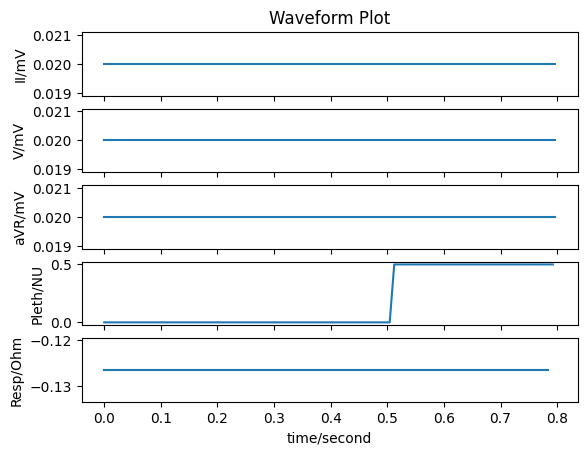

In [23]:
rec = wfdb.rdrecord('/Users/anja/Documents/Promotion/Daten/MIMIC/MIMIC-IV-Waveform/files/mimic4wdb/0.1.0/waves/p100/p10014354/81739927/81739927_0002',
                    sampfrom=0, sampto=50,
                    smooth_frames=False)

wfdb.plot_wfdb(record=rec, title='Waveform Plot', time_units='seconds')


In [ ]:

for (name, units, data) in zip(rec.sig_name,
                               rec.units,
                               rec.e_p_signal):
    print('{} (units {}):'.format(name, units))
    print(data)